# STATS 542: Homework 9

<h4><center> Diego Kleiman (diegoek2) </center></h4>
<h4><center> Due: Tuesday 11:59 PM CT, Apr 6th </center></h4>

## About HW9

In this homework we will extend the the Gaussian mixture model in the lecture note to a two-dimensional case, where both the mean and variance are unknown. Again, by using the EM algorithm, we face two steps, the E-step that calculates the conditional expectation of the likelihood, and the M-step that update the $\boldsymbol\theta$ estimates. One nontrivial step is to derive analytic solution of $\boldsymbol\theta$ in the M-step, which involves some matrix calculation and tricks. Some hints are provided. Finally, we will implement the method using our own code. 

## Question 1 [100 Points] A Two-dimensional Gaussian Mixture Model

__If you do not use latex to type your answer, you will lose 2 points__. We consider another example of the EM algorithm, which fits a Gaussian mixture model to the Old Faithful eruption data. The data is provided at the course website. For a demonstration (and **partial solution**) of this problem, see the figure provided on [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm). As a result, we will use the formula to implement the EM algorithm and obtain the distribution parameters of the two underlying Gaussian distributions. Here is a visualization of the data:

```r
  # load the data
  load("..\\data\\faithful.rda")
  plot(faithful, pch = 19)
```

We use both variables `eruptions` and `waiting`. The plot above shows that there are two eruption patterns (clusters). Hence, we use a hidden Bernoulli random variable $Z_i \sim \text{Bern}(\pi)$ to indicate which pattern an observed eruption falls into. The corresponding distribution of `eruptions` and `waiting` can be described by a two-dimensional Gaussian --- either $N(\boldsymbol \mu_1, \boldsymbol \Sigma_1)$ or $N(\boldsymbol \mu_2, \boldsymbol \Sigma_2)$ --- depending on the outcome of $Z_i$. Here, the collection of parameters is $\boldsymbol \theta = \{\boldsymbol \mu_1, \boldsymbol \Sigma_1, \boldsymbol \mu_2, \boldsymbol \Sigma_2, \pi\}$, and we want to use the EM algorithm to estimate them.

#### Part a) [20 Points] The E-Step

Based on the above assumption of eruption patterns, write down the full log-likelihood $\ell(\mathbf{x}, \mathbf{z} | \boldsymbol \theta)$. In the E-step, we need the conditional expectation 

$$g(\boldsymbol \theta | \boldsymbol \theta^{(k)}) = E_{\mathbf{Z} | \mathbf{x}, \boldsymbol \theta^{(k)}}[\ell(\mathbf{x}, \mathbf{Z} | \boldsymbol \theta)].$$ 
If you do not know where to start, then the answer is already provided on the Wikipedia page. Derive the conditional expectation ($p_i$) of $\mathbf{Z}$ given $\mathbf{x}$ and $\boldsymbol \theta^{(k)}$, using notations in our lecture. 

### Answer:

Note: I will try to use the notation from the lecture as precisely as possible. These are the meaning of the symbols I used:
- $x_i$: data point $i$.
- $z_i$: latent variable for $x_i$.
- $\theta^{(k)}$: model parameters (at step $k$).
- $\pi$ or $\pi_j$: probability of $z_i = 1$ or $z_i = j$, respectively (from the underlying Bernoulli model).
- $p_i$ or $p_{j, i}$: short form for the conditional probabilty of $z_i = 1$ or $z_i = j$, respectively (unlike the previous parameter, this is different for each datapoint). 
- I will also need to use $\pi$, the irrational number, at one step. I think it is clear enough not to confuse it with the probability of $z_i = 1$ (and it does not bear any importance in the MLE).
- $\phi_{\mu_j, \Sigma_j}(x_i)$: Gaussian pdf with parameters ${\mu_j, \Sigma_j}$ evaluated at $x_i$.

First, I will write the expression for $p(x_i, z_i \vert \theta)$, which is the conditional probablity of $z_i$ given $x_i$ and $\theta$.

$$p(x_i, z_i \vert \theta) = p(z_i \vert \theta) \cdot p(x_i \vert z_i, \theta)$$

where

$$p(z_i \vert \theta) = z_i \cdot \pi + (1-z_i)(1-\pi)$$
$$p(x_i \vert z_i, \theta) = z_i \phi_{\mu_1, \Sigma_1}(x_i) + (1-z_i) \phi_{\mu_2, \Sigma_2}(x_i)$$

From Bayes theorem, the expression that we can use to compute the conditional expectation of $\bf{Z}$ is

$$ p_{j,i}^{(k)} = P(z_i=j \vert x_i, \theta^{(k)}) = \frac{\pi_j^{(k)} \phi_{\mu_j, \Sigma_j}(x_i)} {\sum_j \pi_j^{(k)} \phi_{\mu_j, \Sigma_j}(x_i)} $$

Therefore, the likelihood is 

$$L(\mathbf{x}, \mathbf{z} \vert \mathbf{\theta}) = \prod_{i=1}^N\left[ \left(z_i \cdot \pi + (1-z_i)(1-\pi)\right)\left(z_i \phi_{\mu_1, \Sigma_1}(x_i) + (1-z_i) \phi_{\mu_2, \Sigma_2}(x_i)\right)\right]$$
$$\ell(\mathbf{x}, \mathbf{z} \vert \mathbf{\theta}) = \log L(\mathbf{x}, \mathbf{z} \vert \mathbf{\theta}) = \sum_{i=1}^N \sum_{j=0}^1\mathbf{1}\{z_i=j\} \left[ \log \phi_{\mu_j, \Sigma_j}(x_i) + \log \pi_j \right]$$

Since $\phi_{\mu_j, \Sigma_j}(x_i)$ is a multivariate ($d$-dimensional) Gaussian pdf, we have

$$\log \phi_{\mu_j, \Sigma_j}(x_i) = -\frac{d}{2} \log(2\pi) -\frac{1}{2}\log\vert\mathbf{\Sigma}_j\vert -\frac{1}{2}(\mathbf{x}_i - \mathbf{\mu}_j)^T \mathbf{\Sigma}_j^{-1} (\mathbf{x}_i - \mathbf{\mu}_j)$$

To express the expectation $E_{\mathbf{Z} | \mathbf{x}, \boldsymbol \theta^{(k)}}$ it's simpler to use the expression $\ell(x_i, z_i \vert \mathbf{\theta})$ which is just the log likelihood evaluated at a single point $i$.

$$g(\boldsymbol \theta | \boldsymbol \theta^{(k)}) = E_{\mathbf{Z} | \mathbf{x}, \boldsymbol \theta^{(k)}} = \sum_{i=1}^N \sum_{j=0}^1 \left[ \ell(x_i, z_i \vert \mathbf{\theta}^{(k)} ) p_{j,i}^{(k)}\right] = $$

$$= \sum_{i=1}^N \sum_{j=0}^1 \left[ \left( -\frac{d}{2} \log(2\pi) -\frac{1}{2}\log\vert\mathbf{\Sigma}_j^{(k)}\vert -\frac{1}{2}(\mathbf{x}_i - \mathbf{\mu}_j^{(k)})^T (\mathbf{\Sigma}_j^{(k)})^{-1} (\mathbf{x}_i - \mathbf{\mu}_j^{(k)}) + \log \pi_j^{(k)} \right) p_{j,i}^{(k)}\right]$$

#### Part b) [30 Points] The M-Step

[10 points] Once we have $g(\boldsymbol \theta | \boldsymbol \theta^{(k)})$, the M-step is to re-calculate the maximum likelihood estimators of $\boldsymbol \mu_1$, $\boldsymbol \Sigma_1$, $\boldsymbol \mu_2$, $\boldsymbol \Sigma_2$ and $\pi$. Again the answer was already provided on Wikipedia. However, you need to provide a derivation of these estimators. __Hint__: by taking the derivative of the objective function with respect to the parameters, the proof involves three tricks: 

  + $\text{Trace}(\beta^T \Sigma^{-1}\beta) = \text{Trace}(\Sigma^{-1}\beta \beta^T)$
  + $\frac{\partial}{\partial A} \log |A| = A^{-1}$
  + $\frac{\partial}{\partial A} \text{Trace}(BA) = B^T$
  

### Answer:

First, I will find $\pi_j^{(k)}$. To make the derivation simpler, I will write it in terms of $\pi_1^{(k)}$ and $\pi_0^{(k)}=(1-\pi_1^{(k)})$.

$$\frac{\partial g(\boldsymbol \theta \vert \boldsymbol \theta^{(k)})}{\partial \pi_0^{(k)}} = \frac{\partial} {\partial \pi_0^{(k)}} \sum_{i=1}^N \left[ \log \pi_1^{(k)} p_{1,i}^{(k)} + \log (1-\pi_1^{(k)}) (1-p_{1,i}^{(k)}) \right] =$$

$$= \frac{1}{\pi_1^{(k)}} \sum_{i=1}^N p_{1,i}^{(k)} + \frac{1}{(1 - \pi_1^{(k)})} \sum_{i=1}^N (1 - p_{1,i}^{(k)}) = 0$$

$$ \Rightarrow \pi_1^{(k)} = \frac{\sum_i p_{1,i}^{(k)}}{\sum_i p_{1,i}^{(k)} + \sum_i p_{0,i}^{(k)}} = \frac{1}{n} \sum_i^N p_{1,i}^{(k)}$$

By symmetry, we have

$$\pi_0^{(k)} = \frac{1}{n} \sum_i^N p_{0,i}^{(k)}$$

Now I will derive $\mathbf{\mu}_j^{(k)}$.

$$\frac{\partial g(\boldsymbol \theta \vert \boldsymbol \theta^{(k)})}{\partial \mathbf{\mu}_j^{(k)}} = \sum_i^N p_{j,i}^{(k)}(\mathbf{\Sigma}_j^{(k)})^{-1}(\mathbf{x}_i - \mathbf{\mu}_j^{(k)})= \mathbf{0}$$

$$\Rightarrow \mathbf{\mu}_j^{(k)} = \frac{\sum_i \mathbf{x}_i p_{j,i}^{(k)}}{\sum_i p_{j,i}^{(k)}}$$

To compute the derivative, I used the following identity $\frac{\partial}{\partial \mathbf{v}} \mathbf{v}^T\mathbf{A}\mathbf{v} = 2\mathbf{A}\mathbf{v}$.

Now I will derive $\mathbf{\Sigma}_j^{(k)}$.

$$\frac{\partial g(\boldsymbol \theta \vert \boldsymbol \theta^{(k)})}{\partial (\mathbf{\Sigma}_j^{(k)})^{-1}} = \sum_{i}^N \left[ -\frac{1}{2} \frac{\partial}{\partial (\mathbf{\Sigma}_j^{(k)})^{-1}} \log \vert \mathbf{\Sigma}_j^{(k)} \vert - \frac{1}{2} \frac{\partial}{\partial (\mathbf{\Sigma}_j^{(k)})^{-1}} \text{Trace}\left((\mathbf{x}_i - \mathbf{\mu}_j^{(k)})^T (\mathbf{\Sigma}_j^{(k)})^{-1} (\mathbf{x}_i - \mathbf{\mu}_j^{(k)})\right) \right]p_{j,i}^{(k)} = $$

$$ = \frac{1}{2}  \sum_{i}^N \left[ \mathbf{\Sigma}_j^{(k)} - (\mathbf{x}_i - \mathbf{\mu}_j^{(k)})(\mathbf{x}_i - \mathbf{\mu}_j^{(k)})^T \right] p_{j,i}^{(k)} = 0$$

$$\Rightarrow \mathbf{\Sigma}_j^{(k)} = \frac{\sum_i (\mathbf{x}_i - \mathbf{\mu}_j^{(k)})(\mathbf{x}_i - \mathbf{\mu}_j^{(k)})^Tp_{j,i}^{(k)}}{\sum_i p_{j,i}^{(k)}}$$

To compute the derivative I used the identities provided in the question.

#### Part c) [50 Points] Implementing the Algorithm

Implement the EM algorithm using the formula you just derived. Make sure that the following are addressed:
  
  * [5 Points] You need to give a reasonable initial value such that the algorithm converges. 
  * [10 Points] Make sure that you give proper comment on each step to clearly indicate which quantity the code is calculating.
  * [5 Points] Set up a convergence criteria under which the iteration stops.
  * [10 Points] Record the result (all the parameter estimates) for each iteration. Report the final parameter estimates.
  * [10 Points] Make four plots to demonstrate the fitted model and the updating process: your initial values, the first iteration, the second iteration, and the final results. The plots should intuitively demonstrate the fitted Gaussian distributions. For ideas of the plot, refer to the animation on the Wikipedia page or the code given below. 
  * You may use other packages to calculate the Gaussian densities.


### Answers:

* For the initial values, I randomly split the dataset in half, i.e. $\pi=0.5$, and I initialized the mean and covariance according to each data subset. The algorithm converged in 34 steps (see results below), so these values worked fine.
* See comments in function `EM_algorithm`.
* The convergence criteria is the following: if the maximum change in the conditional expectation of the Z vector does not change by more than $\epsilon=1\cdot10^{-8}$ in a given iteration, stop looping.
* The function `EM_algorithm` stores all the parameter estimates for each iteration under the dictionary key `all_params`. For final parameters, see results below.
* See plots below. Each Gaussian distribution was plotted using a different color map.

In [1]:
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
def EM_algorithm(X, init, tol=1e-8, maxiter=1000):
    '''
    Implementation of the EM algorithm for two-dimensional Gaussian mixture model.
    
    Arguments
    -------------
    X: np.ndarray of shape (n_samples, 2). Training data.
    init: np.ndarray of shape (2, 7). Initial parameters.
        Use following order (for each row): mu_1, mu_2, sigma_{0, 0}, sigma_{1, 0}, sigma_{0, 1}, sigma_{1, 1}, pi.
        Remember that "pi" column must sum to 1.
    tol: float (defaul 1e-5). Convergence threshold.
    maxiter: int (default 100000). Maximum number of iterations.
    
    Returns
    -------------
    Results: dictionary with the following keys
        final_params: np.ndarray of shape (2, 7). Final parameters. Order used is the same as for init.
        iterations: int. Number of iterations used.
        all_params: np.ndarray of shape (iterations, 2, 7). Parameters at each iteration step.
        init: np.ndarray of shape (2, 7). Initial parameters.   
    '''
    
    # Make sure that data is two-dimensional
    assert(X.shape[1] == 2)
    n_samples = X.shape[0]
    
    # Make sure that all parameters are present
    assert(init.shape == (2, 7))
    
    # Assign initial parameters to working variables
    mu_1 = init[0, 0:2].copy() # Mean vector for first distribution
    mu_2 = init[1, 0:2].copy() # Mean vector for second distribution
    cov_1 = init[0, 2:6].copy().reshape(2,2) # Covariance matrix for first distribution
    cov_2 = init[1, 2:6].copy().reshape(2,2) # Covariance matrix for second distribution
    pi_1 = init[0, 6].copy() # Latent variable probability for first distribution
    pi_2 = init[1, 6].copy() # Latent variable probability for second distribution
    
    # Split the dimensions to compute the estimator of the mean more easily
    dim_1 = X[:, 0]
    dim_2 = X[:, 1]
    
    # Make sure pi column adds to 1 (i.e., is close enough to 1)
    assert(abs(pi_1 + pi_2 - 1) < 1e-8)
    
    # Initialize arrays to store parameters
    p_1 = np.ones((n_samples,))*0.5 # Conditional expectation of Z
    p_2 = (1 - p_1)
    p_1_prev = np.zeros((n_samples,))
    p_2_prev = (1 - p_1_prev)
    mu_1_all = np.empty((maxiter, 2)) 
    mu_2_all = np.empty((maxiter, 2)) 
    cov_1_all = np.empty((maxiter, 4)) 
    cov_2_all = np.empty((maxiter, 4)) 
    pi_1_all = np.empty((maxiter,)) 
    pi_2_all = np.empty((maxiter,))
    
    iteration = 0

    # Loop stops if maxiter exceeded or if the conditional probabilites of Z don't change by more than tol
    while (iteration < maxiter) and (np.append(np.abs(p_1-p_1_prev), np.abs(p_2-p_2_prev)).max() > tol):
        
        # E step
        # Use Bayes theorem to compute conditional expectation of Z
        phi_1 = multivariate_normal.pdf(X, mean=mu_1, cov=cov_1) # Gaussian densities
        phi_2 = multivariate_normal.pdf(X, mean=mu_2, cov=cov_2)
        
        p_1_prev = p_1 # Store previous result
        p_2_prev = p_2
        
        p_1 = pi_1*phi_1 / (pi_1*phi_1 + pi_2*phi_2) # Conditional probability (from Bayes theorem)
        p_2 = pi_2*phi_2 / (pi_1*phi_1 + pi_2*phi_2) # Equivalent to (1 - p_1)
        
        # M step
        # Use formulae from Q1 to estimate parameters
        
        # Save parameters for the results
        mu_1_all[iteration] = mu_1
        mu_2_all[iteration] = mu_2
        cov_1_all[iteration] = cov_1.reshape(4) 
        cov_2_all[iteration] = cov_2.reshape(4) 
        pi_1_all[iteration] = pi_1 
        pi_2_all[iteration] = pi_2
        
        # Precomute re-usable quantities
        sum_p1 = np.sum(p_1)
        sum_p2 = np.sum(p_2)
        
        # Parameter estimation
        # Pi
        
        pi_1 = sum_p1/n_samples
        pi_2 = sum_p2/n_samples
                
        # Mu
        mu_1[0] = np.sum(dim_1*p_1)/sum_p1
        mu_1[1] = np.sum(dim_2*p_1)/sum_p1
        mu_2[0] = np.sum(dim_1*p_2)/sum_p2
        mu_2[1] = np.sum(dim_2*p_2)/sum_p2
        
        
        # Covariance
        temp_1 = np.matmul((X - mu_1).T, (X - mu_1)*np.tile(p_1, (2,1)).T)
        temp_2 = np.matmul((X - mu_2).T, (X - mu_2)*np.tile(p_2, (2,1)).T)
        
        cov_1 = temp_1/sum_p1
        cov_2 = temp_2/sum_p2
        
        # Update step
        iteration += 1
        
    # Store results
    results = {}
    results['init'] = init
    final_params = np.empty((2, 7))
    
    final_params[0, 0:2] = mu_1
    final_params[1, 0:2] = mu_2
    final_params[0, 2:6] = cov_1.reshape(4)
    final_params[1, 2:6] = cov_2.reshape(4)
    final_params[0, 6] = pi_1
    final_params[1, 6] = pi_2
    
    results['final_params'] = final_params
    results['iterations'] = iteration
    
    all_params = np.empty((iteration, 2, 7))
    all_params[:, 0, 0:2] = mu_1_all[:iteration]
    all_params[:, 1, 0:2] = mu_2_all[:iteration]
    all_params[:, 0, 2:6] = cov_1_all[:iteration]
    all_params[:, 1, 2:6] = cov_2_all[:iteration]
    all_params[:, 0, 6] = pi_1_all[:iteration]
    all_params[:, 1, 6] = pi_2_all[:iteration]
    results['all_params'] = all_params
    
    return results

### Load data

In [3]:
with open('faithful_data.txt', 'r') as fin:
    eruptions = []
    waiting = []
    header = fin.readline() # Not necessary
    for line in fin.readlines():
        _, e, w = line.split()
        eruptions.append(float(e))
        waiting.append(int(w))
    eruptions = np.asarray(eruptions)
    waiting = np.asarray(waiting)
    faithful_data = np.column_stack((eruptions, waiting))

In [4]:
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
plt.style.use('seaborn-poster')
plt.style.use('seaborn-darkgrid')

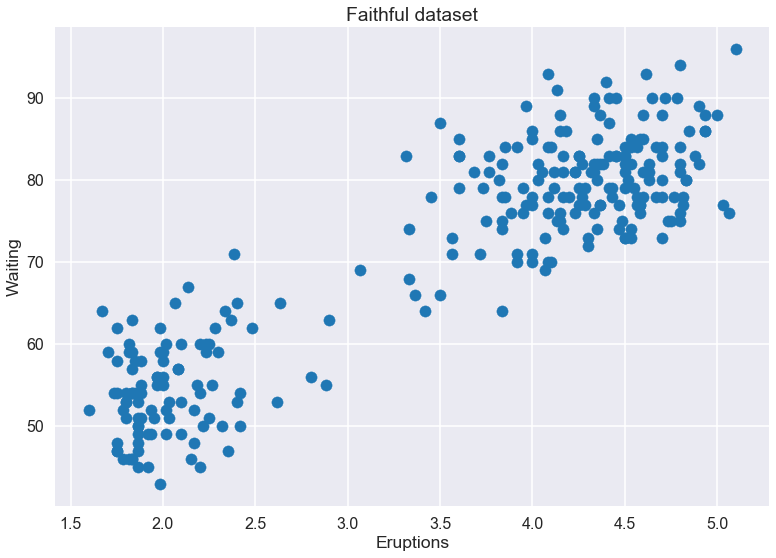

In [5]:
plt.scatter(faithful_data[:,0], faithful_data[:,1])
plt.xlabel("Eruptions")
plt.ylabel("Waiting")
plt.title("Faithful dataset")
plt.show()
plt.close()

### Initialize parameters

To initialize the parameters, I assign the points to one or the other Gaussian distribution with probability $\pi_j = 0.5$.

I then compute the initial means and covariances.

In [6]:
np.random.seed(1)
n_samples = faithful_data.shape[0]
indices = np.random.choice(n_samples, size=n_samples)
first_group = indices[:n_samples//2]
second_group = indices[n_samples//2:]

mu_1 = np.mean(faithful_data[first_group], axis=0)
mu_2 = np.mean(faithful_data[second_group], axis=0)
cov_1 = np.cov(faithful_data[first_group], rowvar=False)
cov_2 = np.cov(faithful_data[second_group], rowvar=False)
pi_1 = 0.5
pi_2 = 0.5

init = np.empty((2, 7))

init[0, 0:2] = mu_1
init[1, 0:2] = mu_2
init[0, 2:6] = cov_1.reshape(4)
init[1, 2:6] = cov_2.reshape(4)
init[0, 6] = pi_1
init[1, 6] = pi_2

In [7]:
results = EM_algorithm(faithful_data, init)

In [8]:
print(results['final_params'])

[[2.03638845e+00 5.44785164e+01 6.91676726e-02 4.35167625e-01
  4.35167625e-01 3.36972821e+01 3.55872857e-01]
 [4.28966197e+00 7.99681152e+01 1.69968436e-01 9.40609319e-01
  9.40609319e-01 3.60462113e+01 6.44127143e-01]]


### Final parameters

* $\mu_1 = \left(2.036 \space 54.48 \right)$
* $\mu_2 = \left(4.290 \space 79.97 \right)$

* $\Sigma_1 = \begin{pmatrix}
0.0692 & 0.4352\\
0.4352 & 33.70
\end{pmatrix}$

* $\Sigma_2 = \begin{pmatrix}
0.1700 & 0.9406\\
0.9406 & 36.05
\end{pmatrix}$

* $\pi_1 = 0.3559$
* $\pi_2 = 0.6441$

In [9]:
print("Total iterations:", results['iterations'])

Total iterations: 34


### Plots

Initial parameters

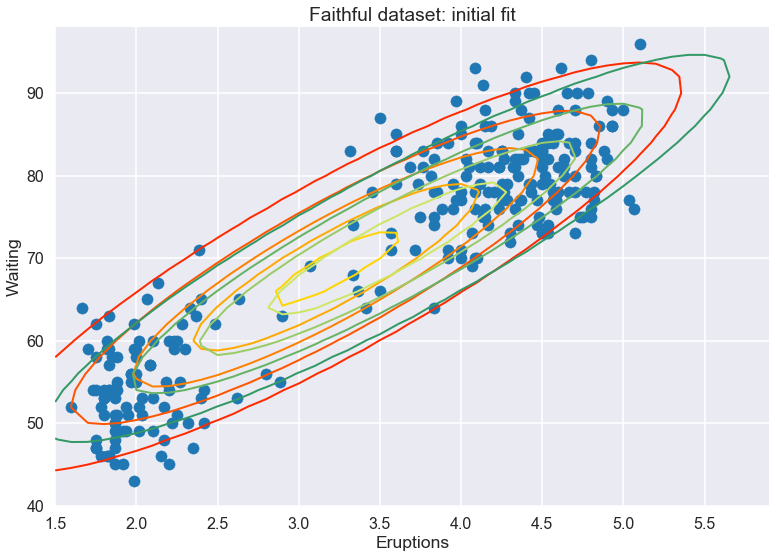

In [10]:
x, y = np.mgrid[1.5:6:0.1, 40:100:2]
pos = np.dstack((x, y))

mu_1 = results['init'][0, :2]
cov_1 = results['init'][0, 2:6].reshape(2,2)
mu_2 = results['init'][1, :2]
cov_2 = results['init'][1, 2:6].reshape(2,2)

rv_1 = multivariate_normal(mu_1, cov_1)
rv_2 = multivariate_normal(mu_2, cov_2)

plt.contour(x, y, rv_1.pdf(pos), 5, linewidths=2, cmap='autumn')
plt.contour(x, y, rv_2.pdf(pos), 5, linewidths=2, cmap='summer')

plt.scatter(faithful_data[:,0], faithful_data[:,1])
plt.xlabel("Eruptions")
plt.ylabel("Waiting")
plt.title("Faithful dataset: initial fit")

plt.show()
plt.close()

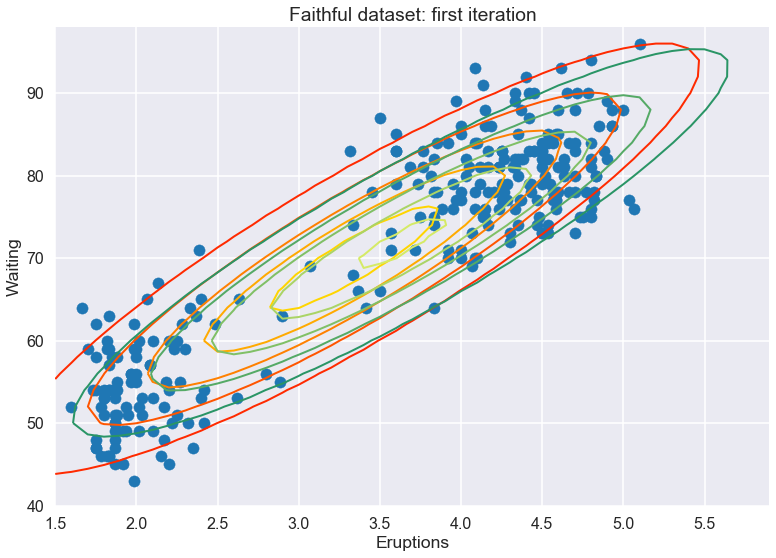

In [11]:
x, y = np.mgrid[1.5:6:0.1, 40:100:2]
pos = np.dstack((x, y))

mu_1 = results['all_params'][1, 0, :2]
cov_1 = results['all_params'][1, 0, 2:6].reshape(2,2)
mu_2 = results['all_params'][1, 1, :2]
cov_2 = results['all_params'][1, 1, 2:6].reshape(2,2)

rv_1 = multivariate_normal(mu_1, cov_1)
rv_2 = multivariate_normal(mu_2, cov_2)

plt.contour(x, y, rv_1.pdf(pos), 5, linewidths=2, cmap='autumn')
plt.contour(x, y, rv_2.pdf(pos), 5, linewidths=2, cmap='summer')

plt.scatter(faithful_data[:,0], faithful_data[:,1])
plt.xlabel("Eruptions")
plt.ylabel("Waiting")
plt.title("Faithful dataset: first iteration")

plt.show()
plt.close()

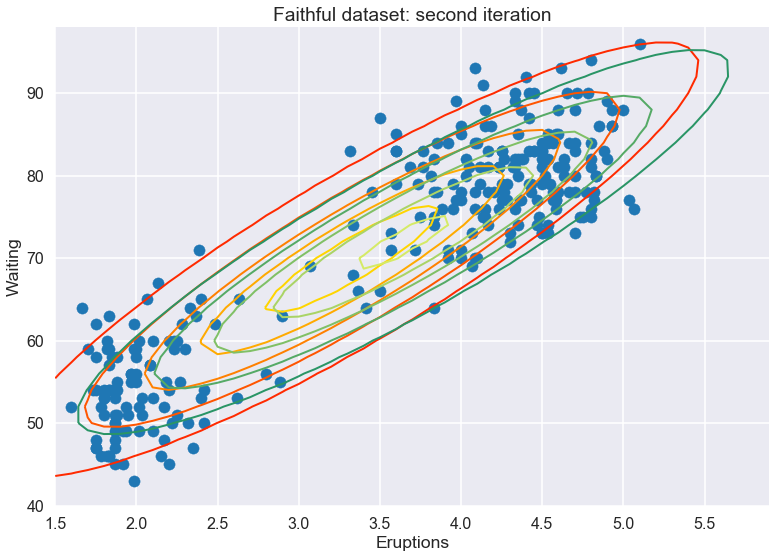

In [12]:
x, y = np.mgrid[1.5:6:0.1, 40:100:2]
pos = np.dstack((x, y))

mu_1 = results['all_params'][2, 0, :2]
cov_1 = results['all_params'][2, 0, 2:6].reshape(2,2)
mu_2 = results['all_params'][2, 1, :2]
cov_2 = results['all_params'][2, 1, 2:6].reshape(2,2)

rv_1 = multivariate_normal(mu_1, cov_1)
rv_2 = multivariate_normal(mu_2, cov_2)

plt.contour(x, y, rv_1.pdf(pos), 5, linewidths=2, cmap='autumn')
plt.contour(x, y, rv_2.pdf(pos), 5, linewidths=2, cmap='summer')

plt.scatter(faithful_data[:,0], faithful_data[:,1])
plt.xlabel("Eruptions")
plt.ylabel("Waiting")
plt.title("Faithful dataset: second iteration")

plt.show()
plt.close()

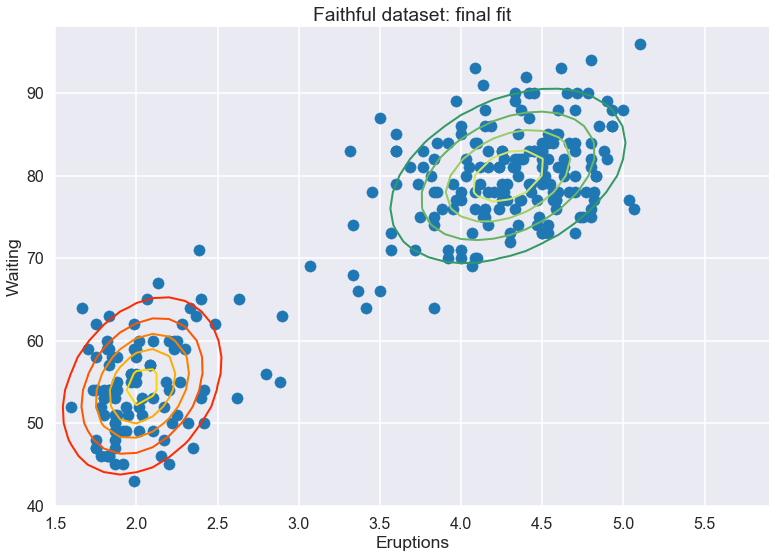

In [13]:
x, y = np.mgrid[1.5:6:0.1, 40:100:2]
pos = np.dstack((x, y))

mu_1 = results['final_params'][0, :2]
cov_1 = results['final_params'][0, 2:6].reshape(2,2)
mu_2 = results['final_params'][1, :2]
cov_2 = results['final_params'][1, 2:6].reshape(2,2)

rv_1 = multivariate_normal(mu_1, cov_1)
rv_2 = multivariate_normal(mu_2, cov_2)

plt.contour(x, y, rv_1.pdf(pos), 5, linewidths=2, cmap='autumn')
plt.contour(x, y, rv_2.pdf(pos), 5, linewidths=2, cmap='summer')

plt.scatter(faithful_data[:,0], faithful_data[:,1])
plt.xlabel("Eruptions")
plt.ylabel("Waiting")
plt.title("Faithful dataset: final fit")

plt.show()
plt.close()